In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv('./dat/online_shoppers_intention.csv.gz')

In [26]:
df.head(10)

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   
5               0                      0.0              0   
6               0                      0.0              0   
7               1                      0.0              0   
8               0                      0.0              0   
9               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   
5                     0.0              19               154.216667   
6                     0.0               1                 0.000000   
7                     0.0               0                 0.000000   
8                     0.0               2                37.000000   
9                     0.0               3               738.000000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.200000   0.200000         0.0         0.0   Feb                 1   
1     0.000000   0.100000         0.0         0.0   Feb                 2   
2     0.200000   0.200000         0.0         0.0   Feb                 4   
3     0.050000   0.140000         0.0         0.0   Feb                 3   
4     0.020000   0.050000         0.0         0.0   Feb                 3   
5     0.015789   0.024561         0.0         0.0   Feb                 2   
6     0.200000   0.200000         0.0         0.4   Feb                 2   
7     0.200000   0.200000         0.0         0.0   Feb                 1   
8     0.000000   0.100000         0.0         0.8   Feb                 2   
9     0.000000   0.022222         0.0         0.4   Feb                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False  
5        2       1            3  Returning_Visitor    False    False  
6        4       3            3  Returning_Visitor    False    False  
7        2       1            5  Returning_Visitor     True    False  
8        2       2            3  Returning_Visitor    False    False  
9        4       1            2  Returning_Visitor    False    False

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [28]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

Since we have categorical features, the following logic converts them to numerical values.

In [29]:
month_str2num = {
    s: i+1 for i, s in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
} 
df['Month'] = df['Month'].replace(month_str2num)
df['Month'].unique()


visitor_str2num = {
    s: i+1 for i, s in enumerate(['Returning_Visitor', 'New_Visitor', 'Other'])
    
}
df['VisitorType'] = df['VisitorType'].replace(visitor_str2num)
df['VisitorType'].unique()


df.loc[df["Weekend"] == False, "Weekend"] = 0
df.loc[df["Weekend"] == True, "Weekend"] = 1

df.loc[df["Revenue"] == False, "Revenue"] = 0
df.loc[df["Revenue"] == True, "Revenue"] = 1

df['Revenue'] = df['Revenue'].astype('int')

In [30]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [31]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Split the dataset into training and test sets and convert them to numpy arrays.

In [32]:
train_dataset = df.sample(frac=0.8, replace=False, random_state=0)

test_dataset = df.drop(train_dataset.index)

In [33]:
train_features = train_dataset.loc[:, df.columns != 'Revenue']
test_features = test_dataset.loc[:, df.columns != 'Revenue']

train_labels = train_dataset['Revenue']
test_labels = test_dataset['Revenue']

<AxesSubplot: title={'center': 'Distribution of Administrative'}, xlabel='Administrative', ylabel='Count'>

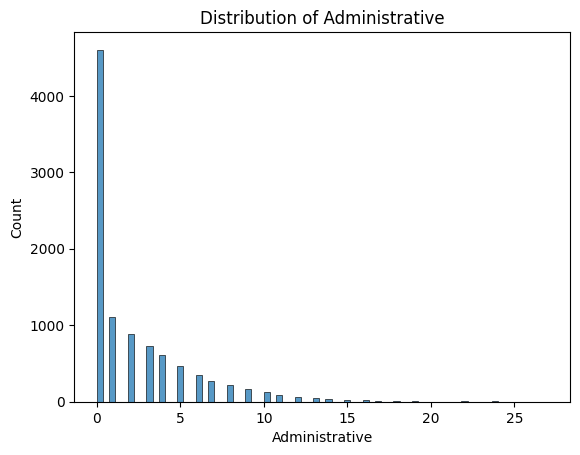

In [34]:
plt.title('Distribution of Administrative')
sns.histplot(data=train_features, x='Administrative')


<AxesSubplot: title={'center': 'Distribution of Informational'}, xlabel='Informational', ylabel='Count'>

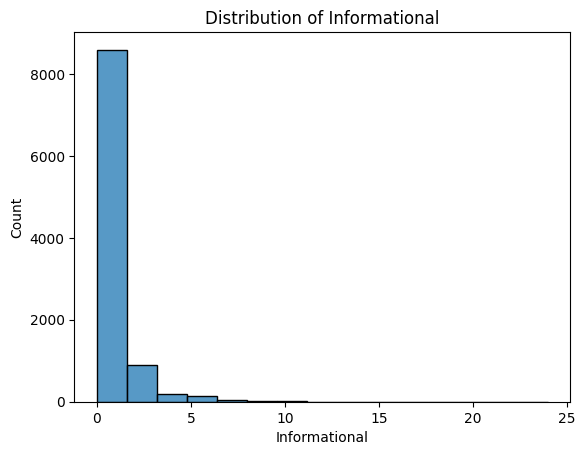

In [35]:
plt.title('Distribution of Informational')
sns.histplot(data=train_features, x='Informational')

<AxesSubplot: title={'center': 'Distribution of Product Related'}, xlabel='ProductRelated', ylabel='Count'>

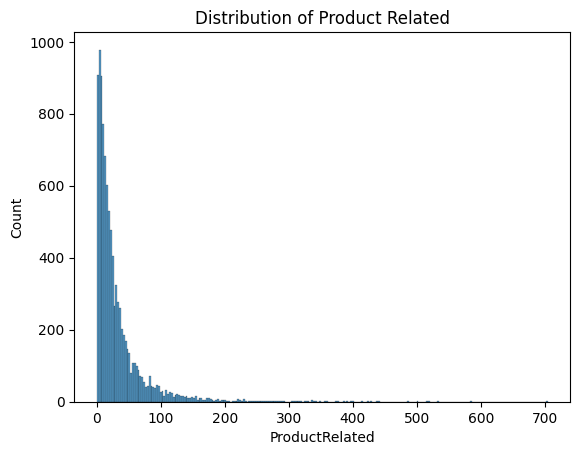

In [36]:
plt.title('Distribution of Product Related')
sns.histplot(data=train_features, x='ProductRelated')

<AxesSubplot: title={'center': 'Count by Month'}, xlabel='Month', ylabel='count'>

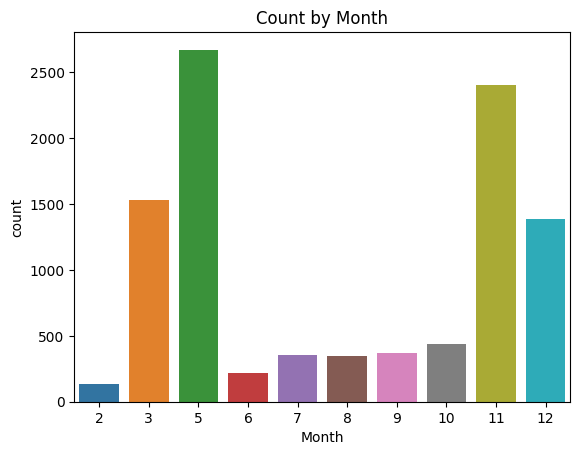

In [37]:
plt.title('Count by Month')
sns.countplot(data=train_features, x='Month')

<AxesSubplot: title={'center': 'Distribution of Visitor Type'}, xlabel='VisitorType', ylabel='count'>

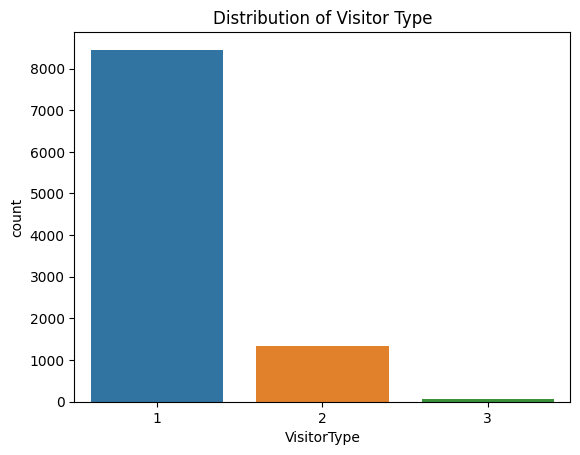

In [38]:
plt.title('Distribution of Visitor Type')
sns.countplot(data=train_features, x='VisitorType')

<AxesSubplot: title={'center': 'Distribution of Administrative Duration'}, xlabel='Administrative_Duration', ylabel='Count'>

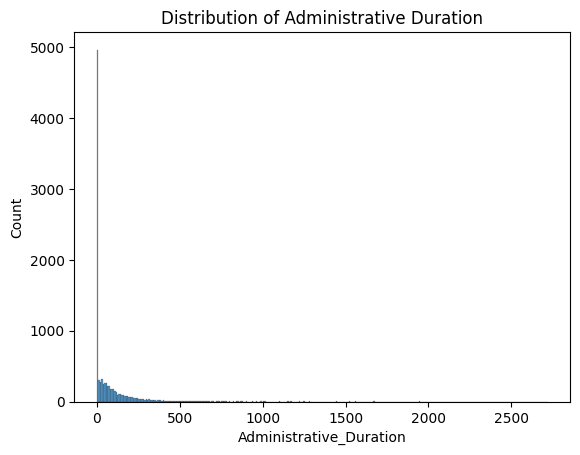

In [39]:
plt.title('Distribution of Administrative Duration')
sns.histplot(data=train_features, x='Administrative_Duration')

<AxesSubplot: title={'center': 'Distribution of Informational Duration'}, xlabel='Informational_Duration', ylabel='Count'>

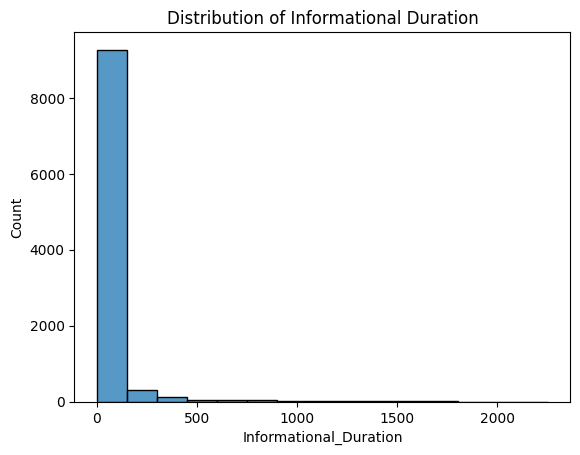

In [40]:
plt.title('Distribution of Informational Duration')
sns.histplot(data=train_features, x='Informational_Duration')

<AxesSubplot: title={'center': 'Distribution of Product Related Duration'}, xlabel='ProductRelated_Duration', ylabel='Count'>

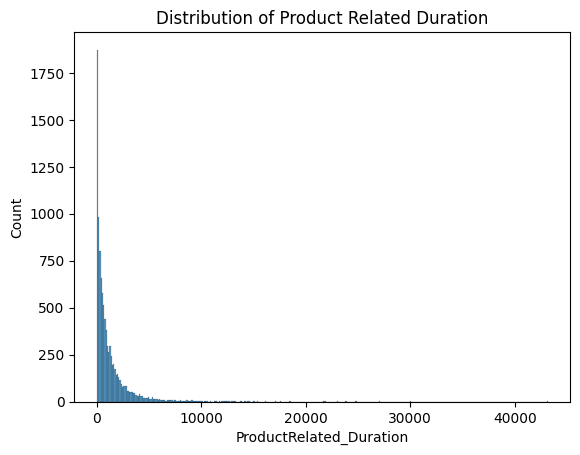

In [41]:
plt.title('Distribution of Product Related Duration')
sns.histplot(data=train_features, x='ProductRelated_Duration')

/var/folders/xh/5cg8lrrd71530j0krmqch2l80000gn/T/ipykernel_4244/3496617187.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_features.corr()


[Text(0.5, 1.0, 'Heatmap - Correlation between features')]

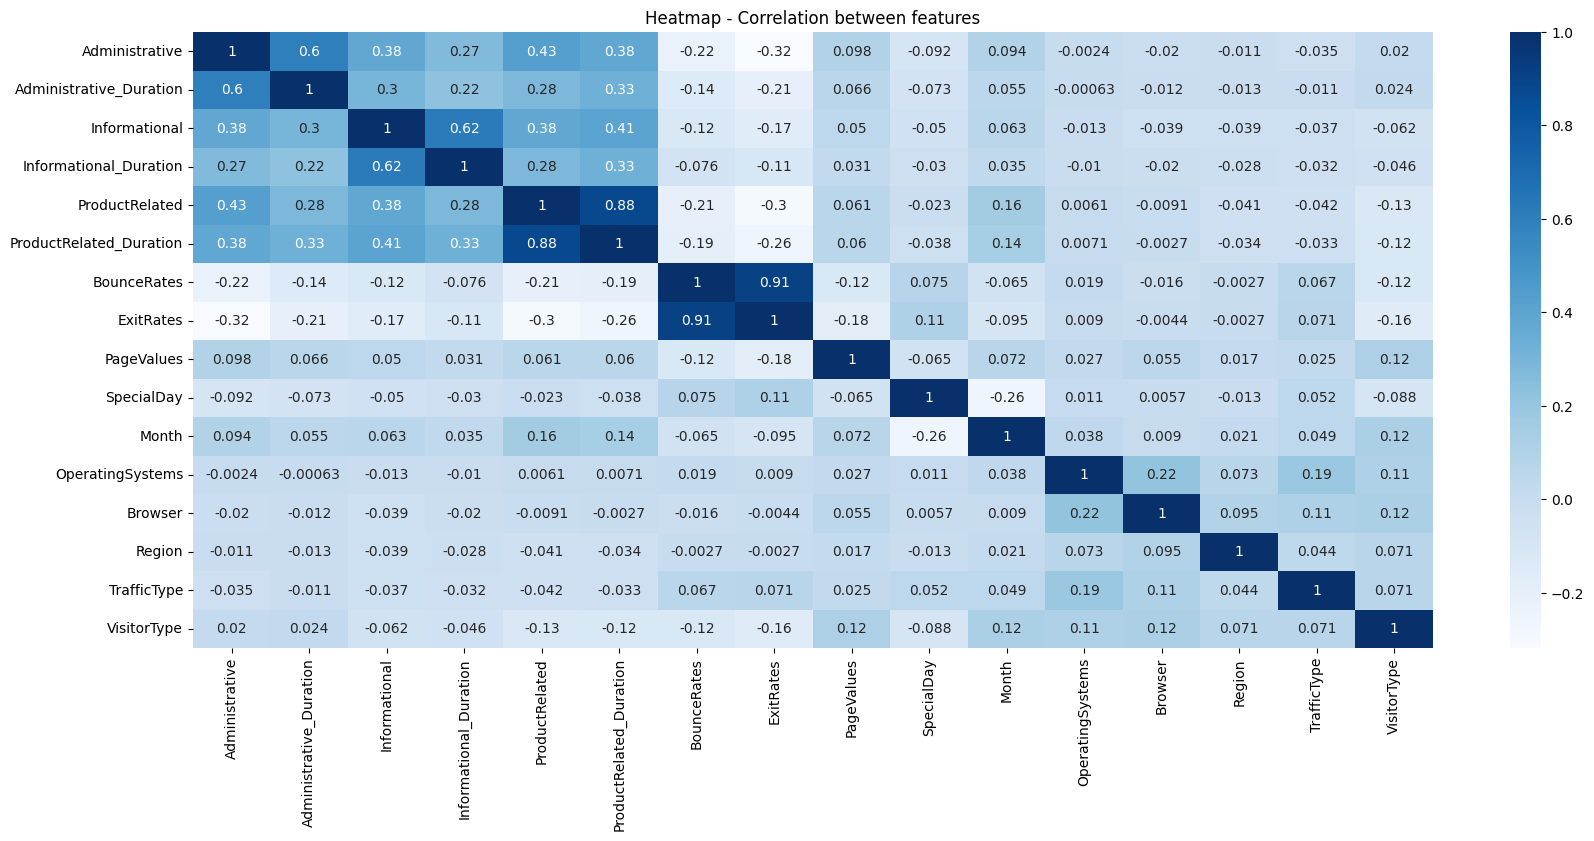

In [42]:

plt.figure(figsize = (20,8))
corr = train_features.corr()
sns.heatmap(corr, cmap="Blues", annot=True).set(title='Heatmap - Correlation between features')

In [43]:
X_train = np.array(train_features)

X_test = np.array(test_features)

y_train = np.array(train_labels)

y_test = np.array(test_labels)

In [44]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The next step is to find out the important features. 

<AxesSubplot: >

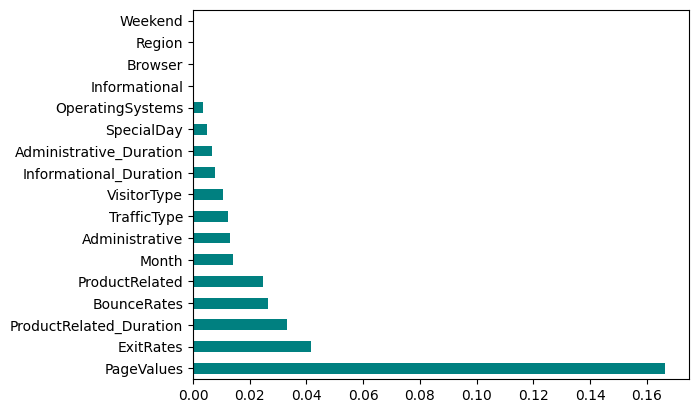

In [45]:

from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)

feature_importances = pd.Series(importances, train_features.columns).sort_values(ascending=False)
feature_importances.plot(kind='barh', color='teal')

<AxesSubplot: >

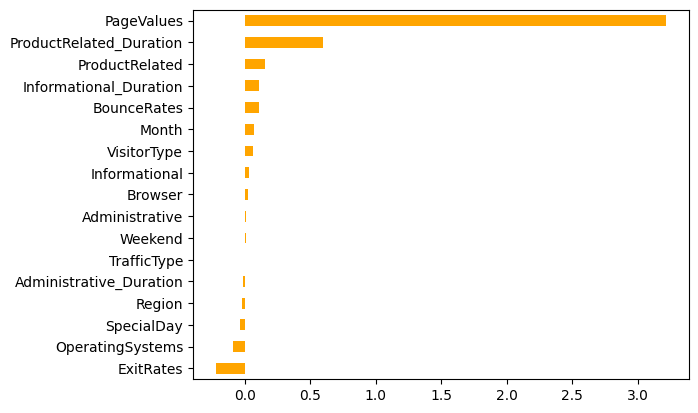

In [46]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)


reg_df = pd.Series(reg.coef_,train_features.columns).sort_values()
reg_df.plot(kind='barh', color='orange')

Model building

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lr_model = LogisticRegression(class_weight= 'balanced')
lr_fit = lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1854
           1       0.77      0.46      0.58       612

    accuracy                           0.83      2466
   macro avg       0.81      0.71      0.74      2466
weighted avg       0.82      0.83      0.82      2466



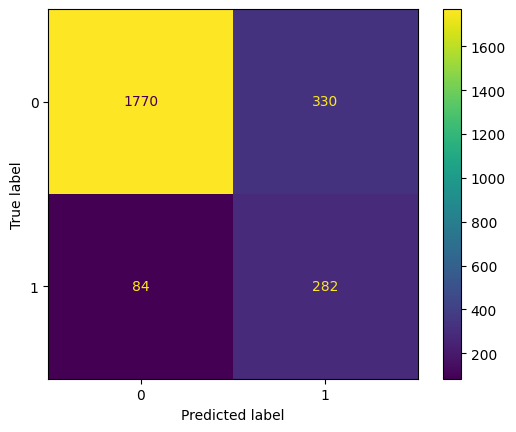

In [48]:
cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot()

Support Vector Machine

In [49]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93      2328
           1       0.29      0.78      0.42       138

    accuracy                           0.88      2466
   macro avg       0.64      0.83      0.68      2466
weighted avg       0.95      0.88      0.91      2466



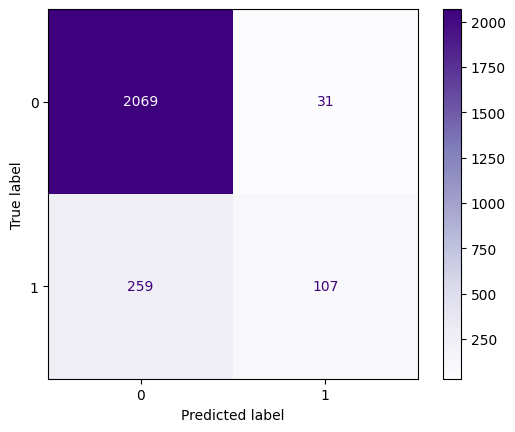

In [50]:
cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Purples)

XGBoost

In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2166
           1       0.56      0.69      0.62       300

    accuracy                           0.90      2466
   macro avg       0.76      0.81      0.78      2466
weighted avg       0.91      0.90      0.90      2466



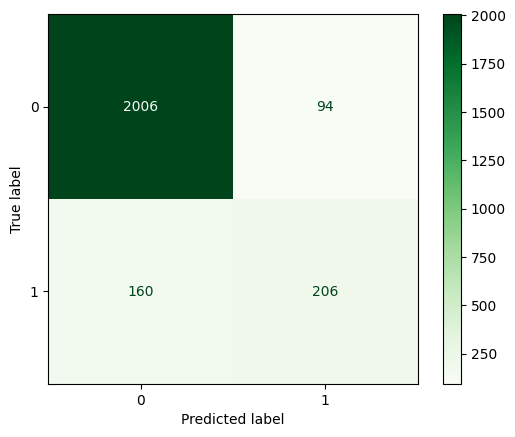

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap=plt.cm.Greens)

TPOT Classifier

In [30]:

from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, 
                      population_size=16,
                      scoring='accuracy',# YOUR CODE HERE
                      verbosity=2,
                      random_state=42)
tpot.fit(X_train, y_train)
print(f"Tpop score on test data: {tpot.score(X_test, y_test):.2f}")
tpot.export('tpot_midterm.py')



'\nfrom tpot import TPOTClassifier\ntpot = TPOTClassifier(generations=10, \n                      population_size=16,\n                      scoring=\'accuracy\',# YOUR CODE HERE\n                      verbosity=2,\n                      random_state=42)\ntpot.fit(X_train, y_train)\nprint(f"Tpop score on test data: {tpot.score(X_test, y_test):.2f}")\ntpot.export(\'tpot_midterm.py\')\n'

In [ ]:
Random Forest classifier based on TPOT 

In [31]:
from sklearn.ensemble import RandomForestClassifier
rgb = RandomForestClassifier(criterion='gini',min_samples_leaf=7,min_samples_split=11,n_estimators=100)

rgb.fit(X_train, y_train)
y_pred = rgb.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2202
           1       0.56      0.77      0.65       264

    accuracy                           0.91      2466
   macro avg       0.76      0.85      0.80      2466
weighted avg       0.93      0.91      0.92      2466



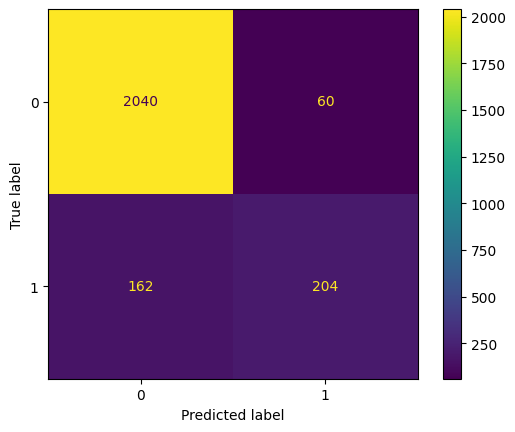

In [32]:
cm = confusion_matrix(y_test, y_pred, labels=rgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rgb.classes_)
disp.plot()

Feature importance

<AxesSubplot: >

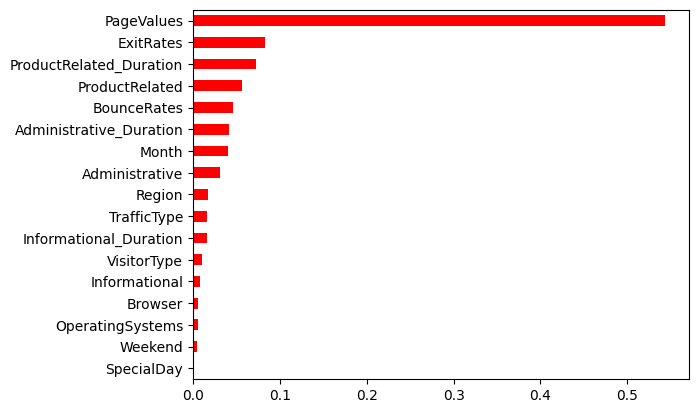

In [33]:
rgb_df = pd.Series(rgb.feature_importances_,train_features.columns).sort_values()
rgb_df.plot(kind='barh', color='red')


Since the data is imbalanced, we'll see if SMOTE helps

In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE()
X_new, y_new = sm.fit_resample(X_train, y_train)
counter = Counter(y_new)
print(counter)

Counter({0: 8322, 1: 8322})


In [35]:

rgb = RandomForestClassifier(criterion='gini',min_samples_leaf=7,min_samples_split=11,n_estimators=100)

rgb.fit(X_new, y_new)
y_pred = rgb.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2009
           1       0.75      0.60      0.67       457

    accuracy                           0.89      2466
   macro avg       0.83      0.78      0.80      2466
weighted avg       0.88      0.89      0.89      2466



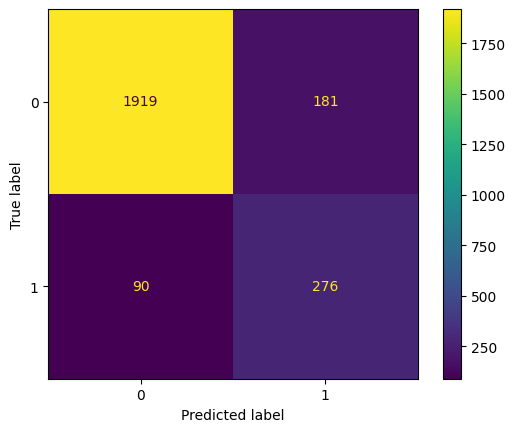

In [36]:
cm = confusion_matrix(y_test, y_pred, labels=rgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rgb.classes_)
disp.plot()

SMOTE doesn't seem to make a difference.
Next step is to do clustering. We'll reduce the number of features based on what we found out in the previous analysis.

In [37]:
#Clustering Analysis
from sklearn.cluster import KMeans

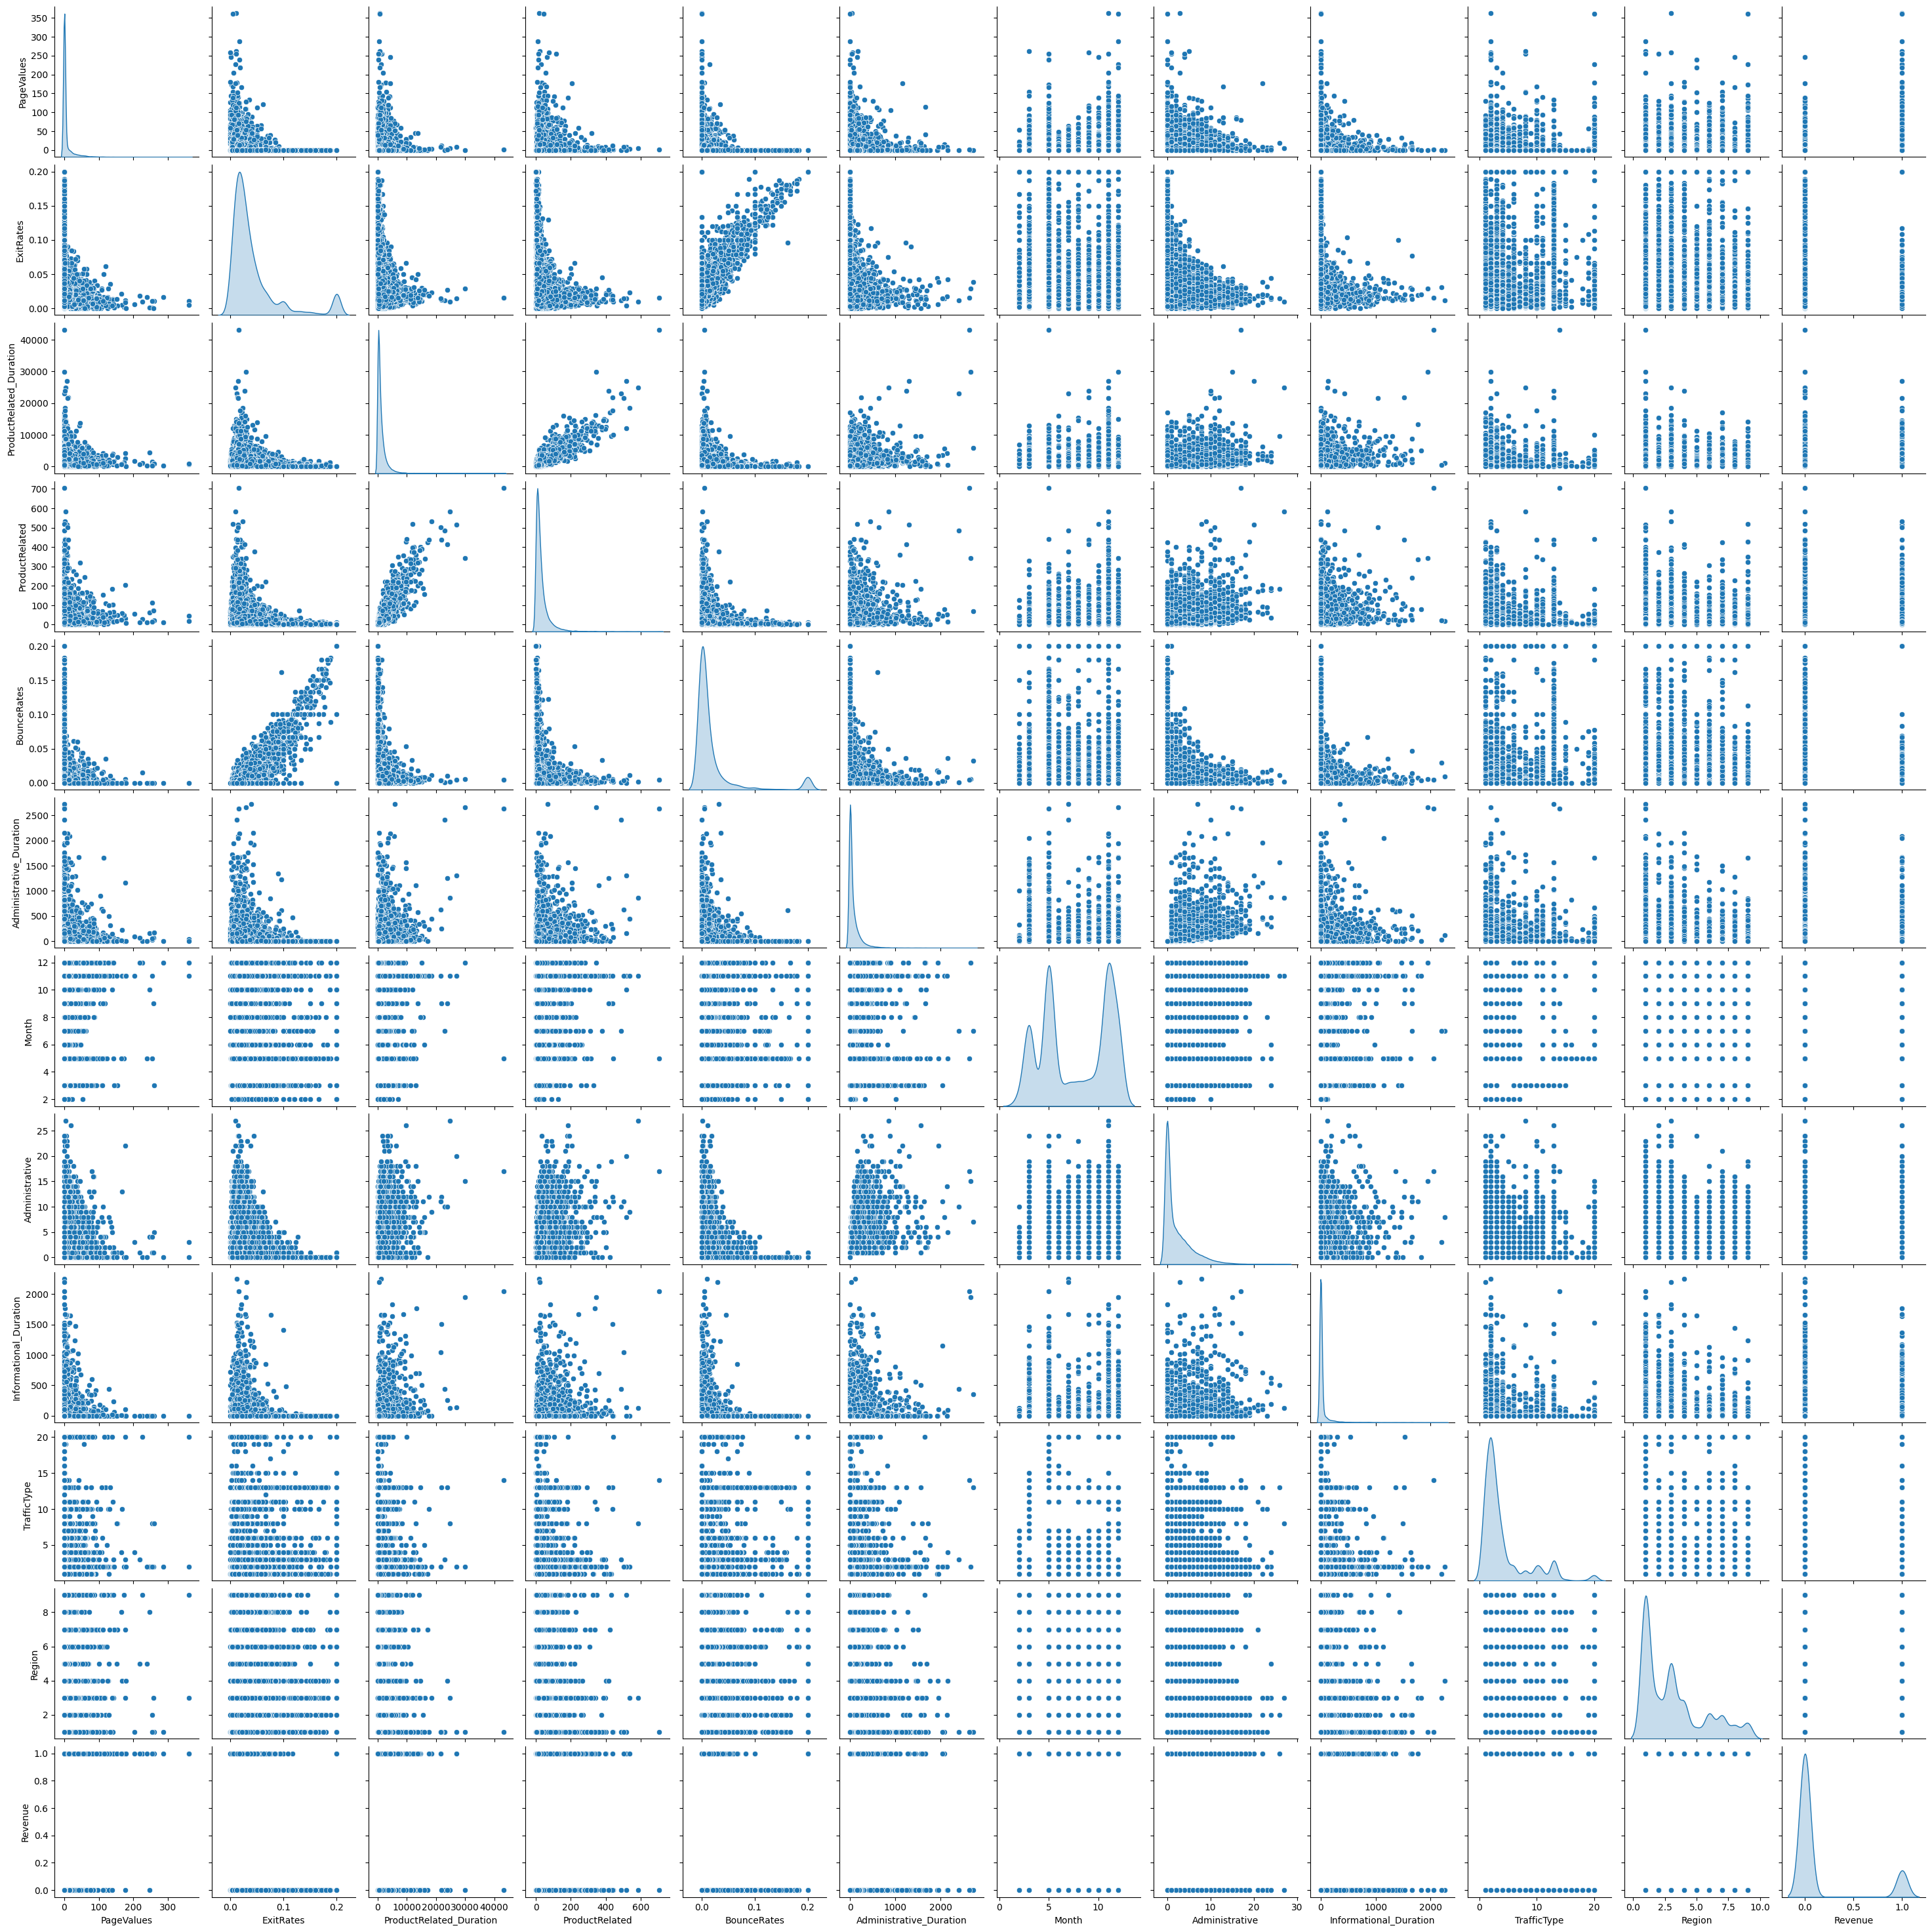

In [38]:
sns.pairplot(train_dataset[['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated','BounceRates', 'Administrative_Duration', 'Month','Administrative','Informational_Duration', 'TrafficType', 'Region','Revenue']], diag_kind='kde');

In [39]:
df_clusters = train_dataset[['PageValues', 'ExitRates', 'ProductRelated_Duration', 'ProductRelated','BounceRates','Revenue']]

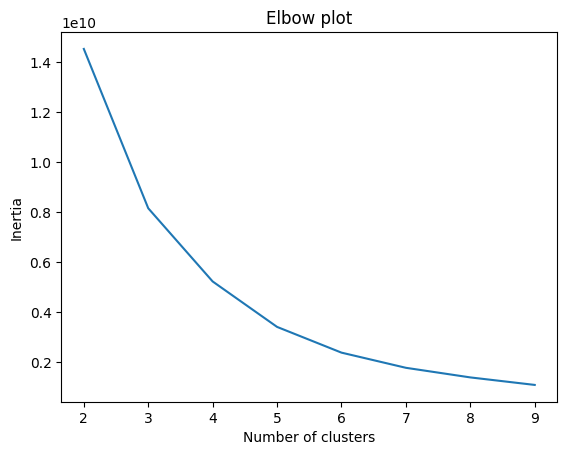

In [40]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        km = KMeans(n_clusters=k, random_state=10).fit(X)
        inertias.append(km.inertia_)
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')
    
visualize_elbow(df_clusters, np.arange(2,10))

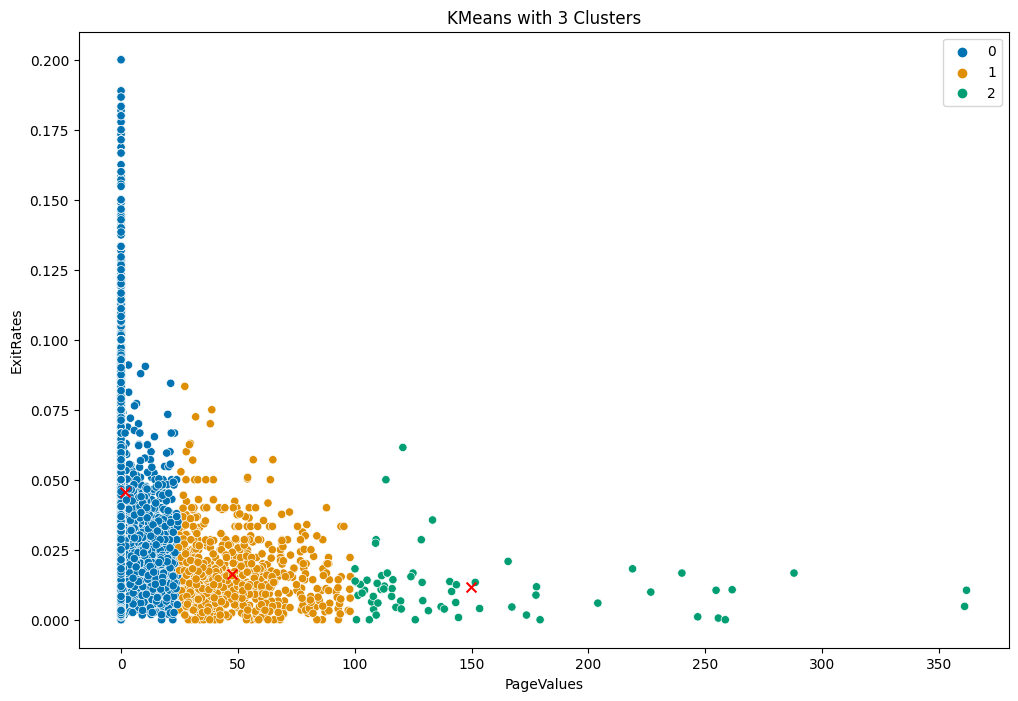

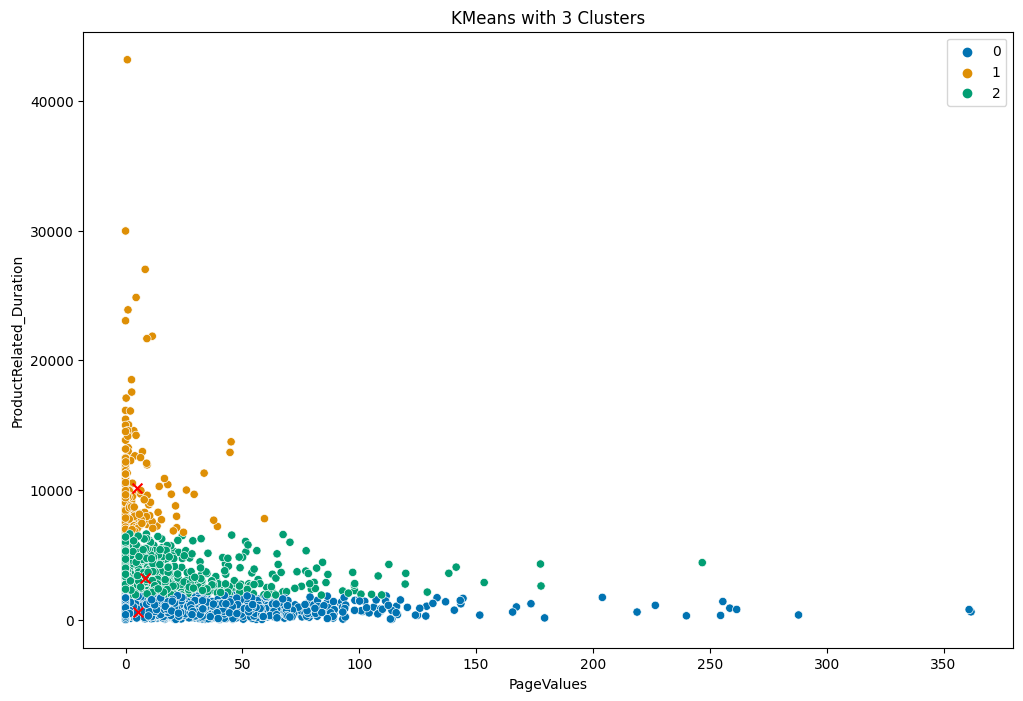

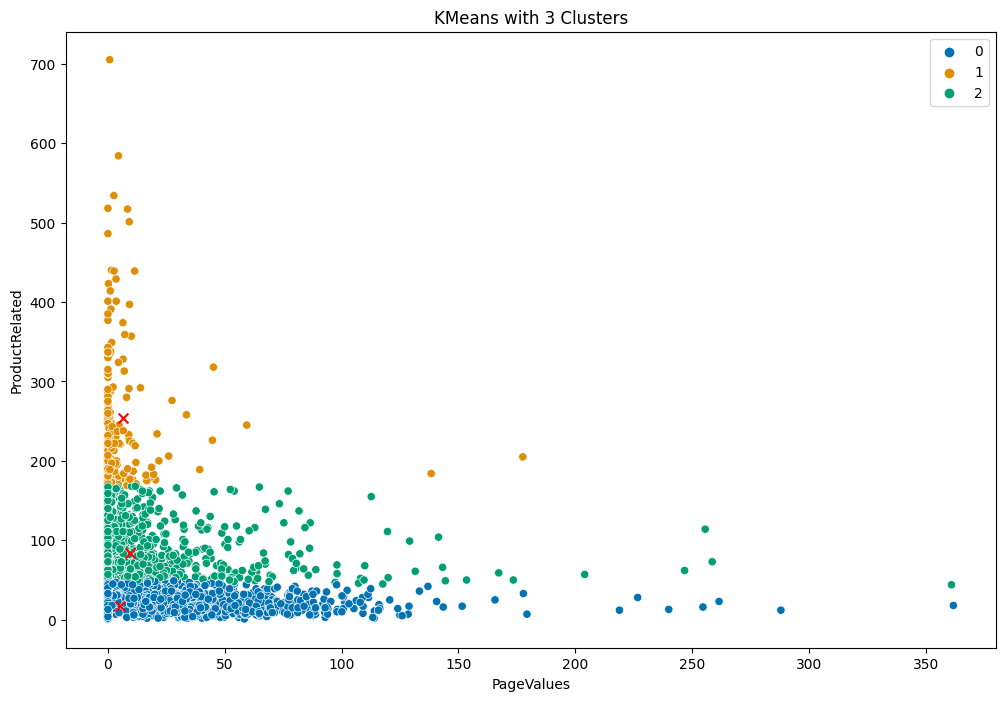

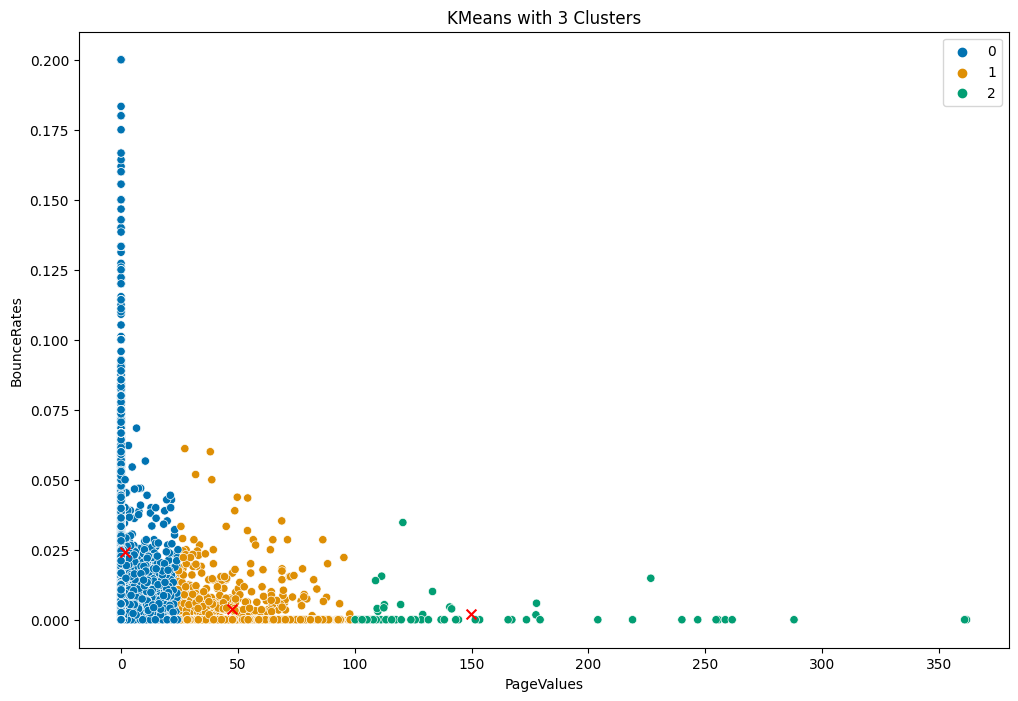

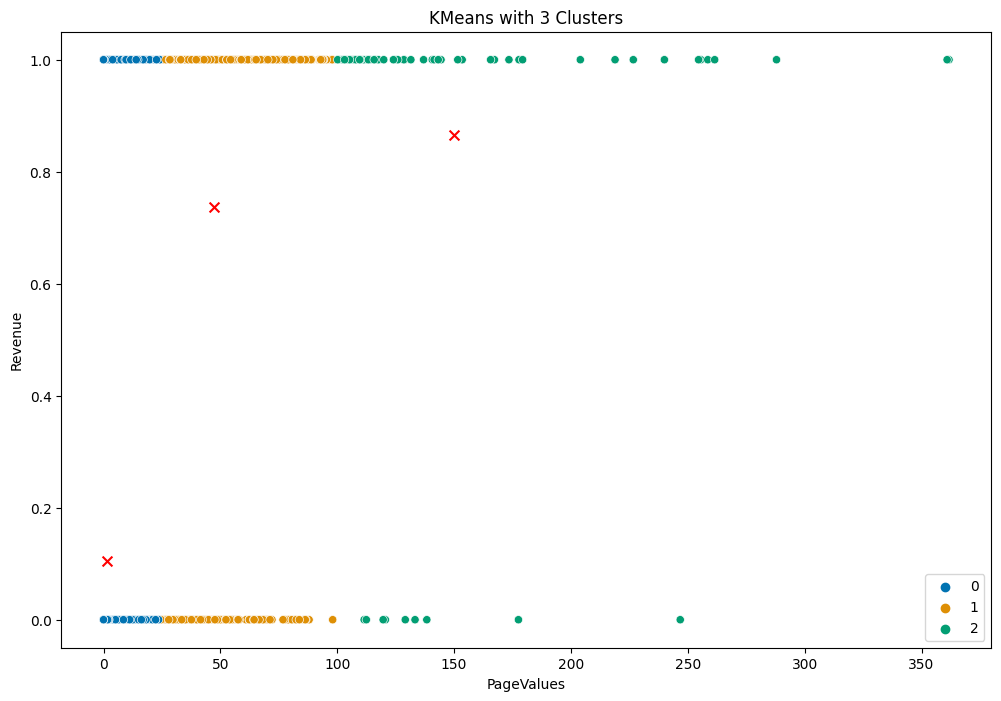

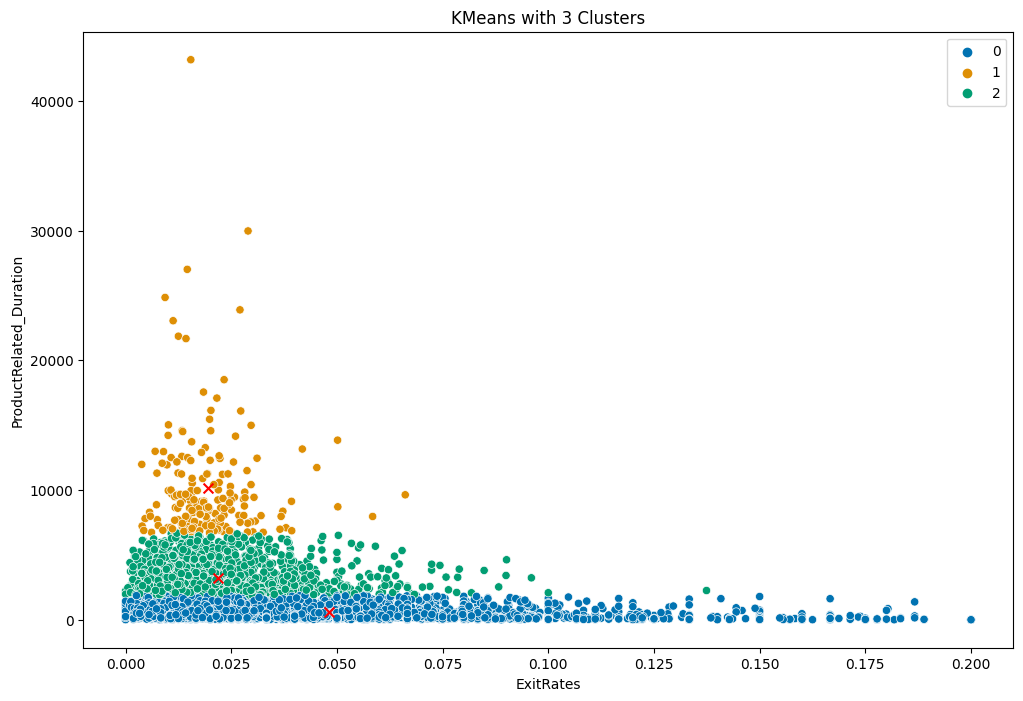

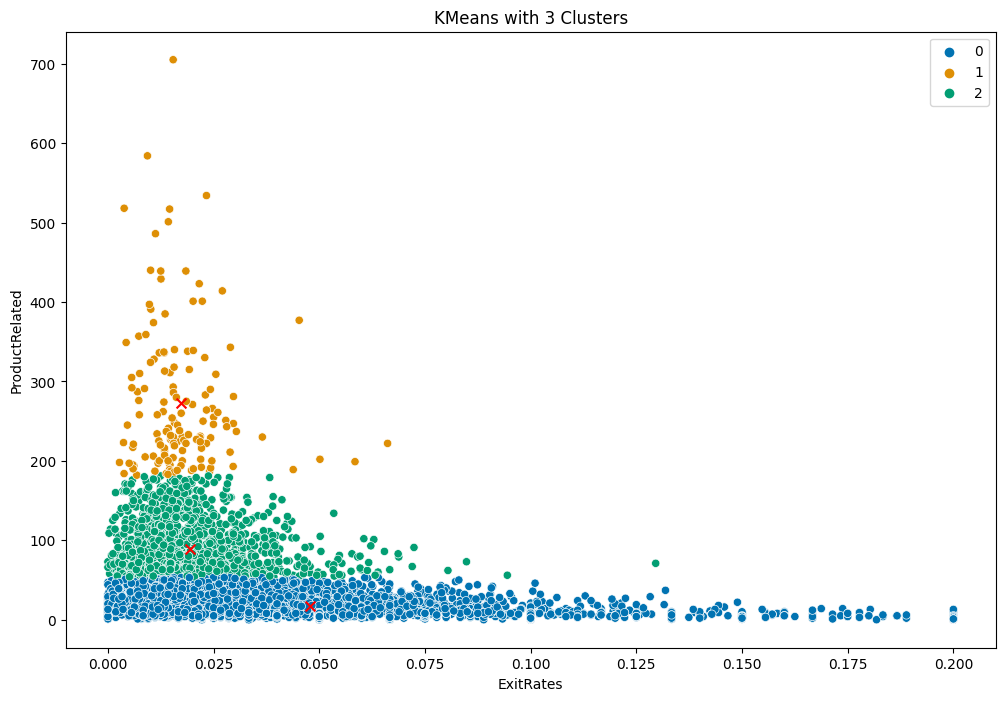

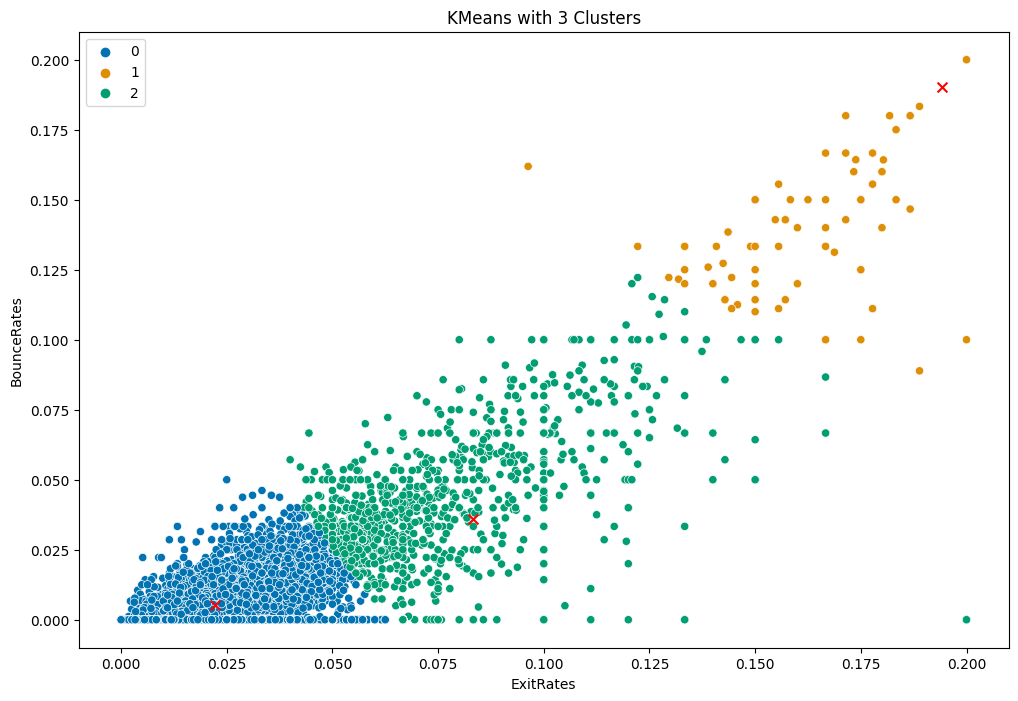

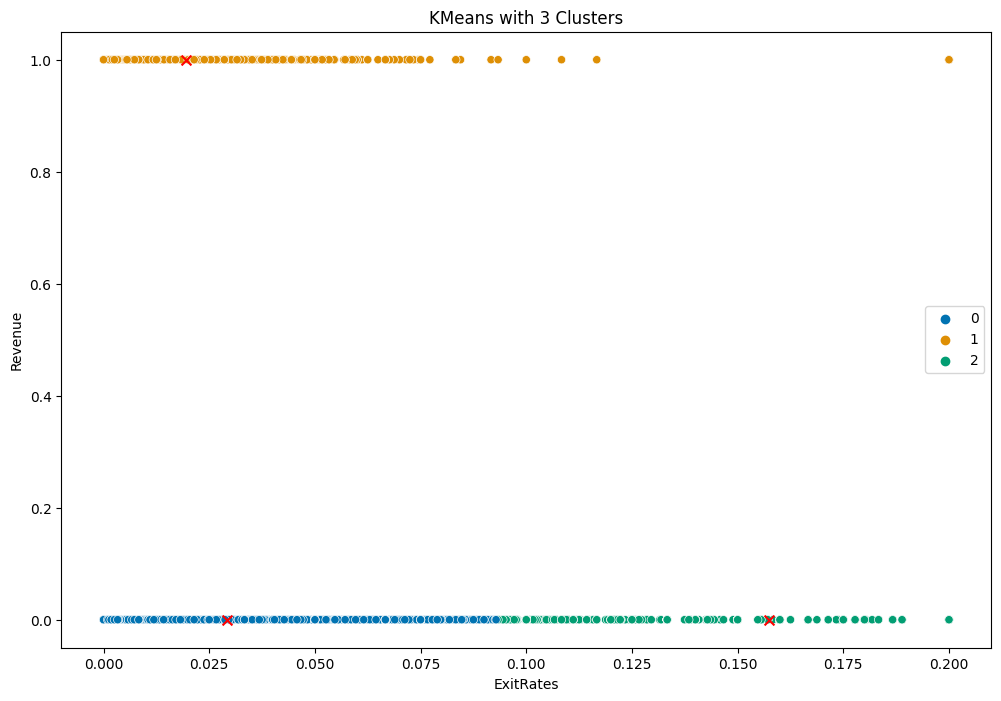

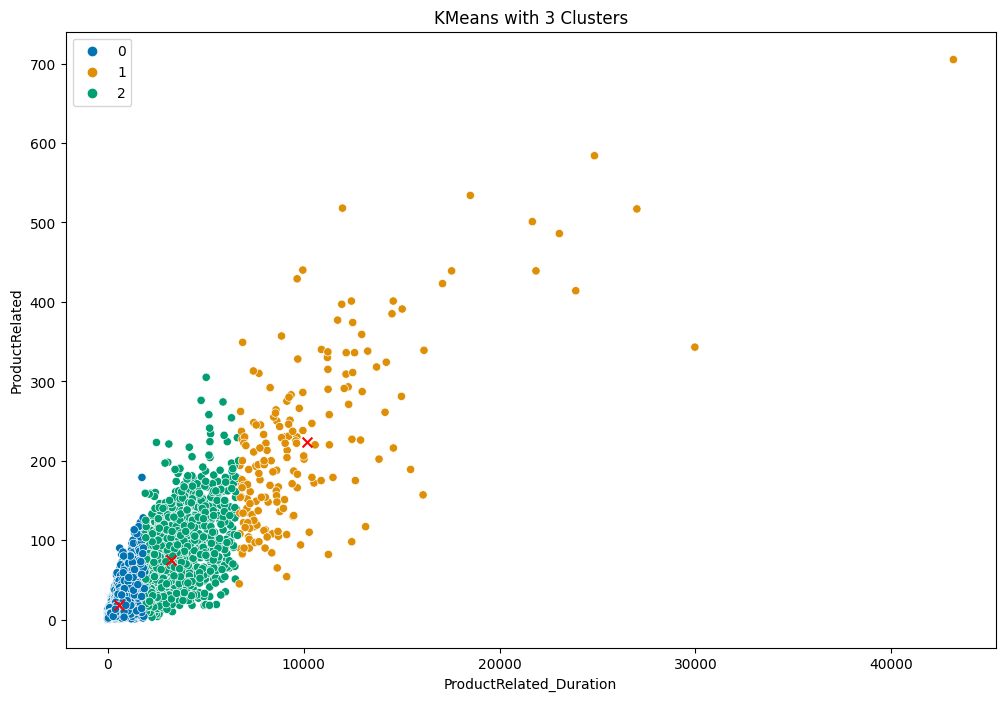

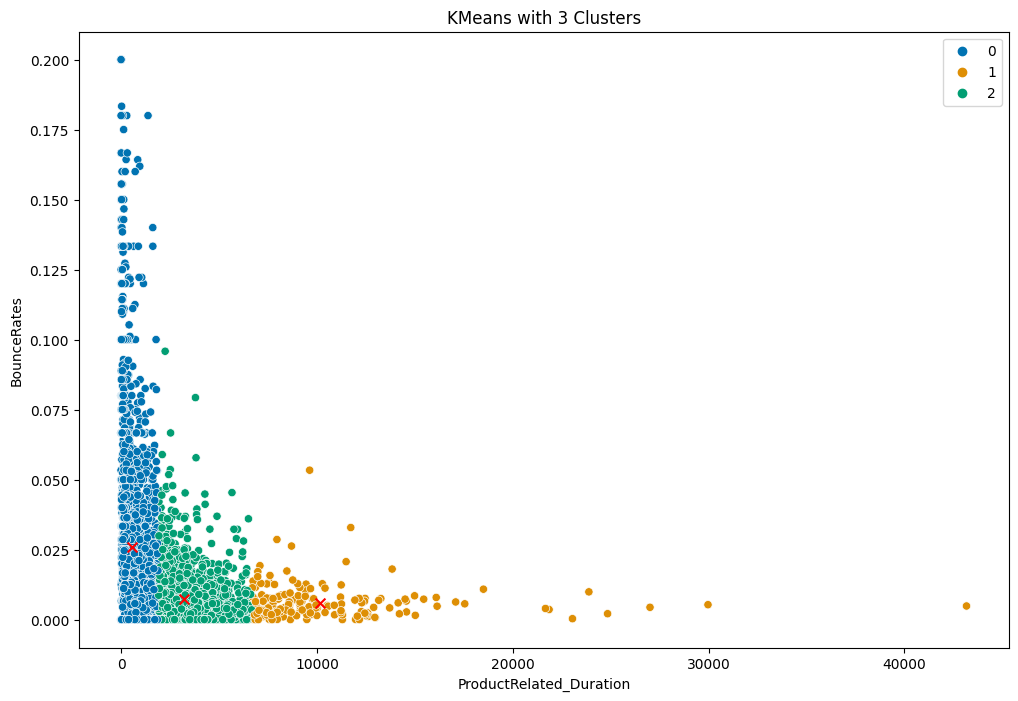

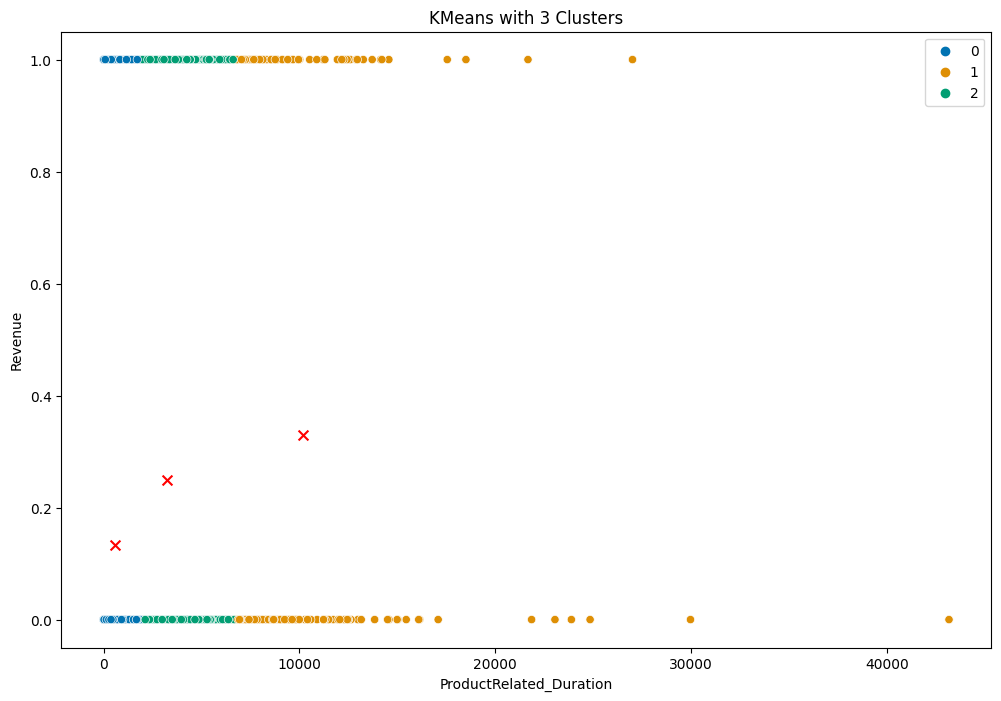

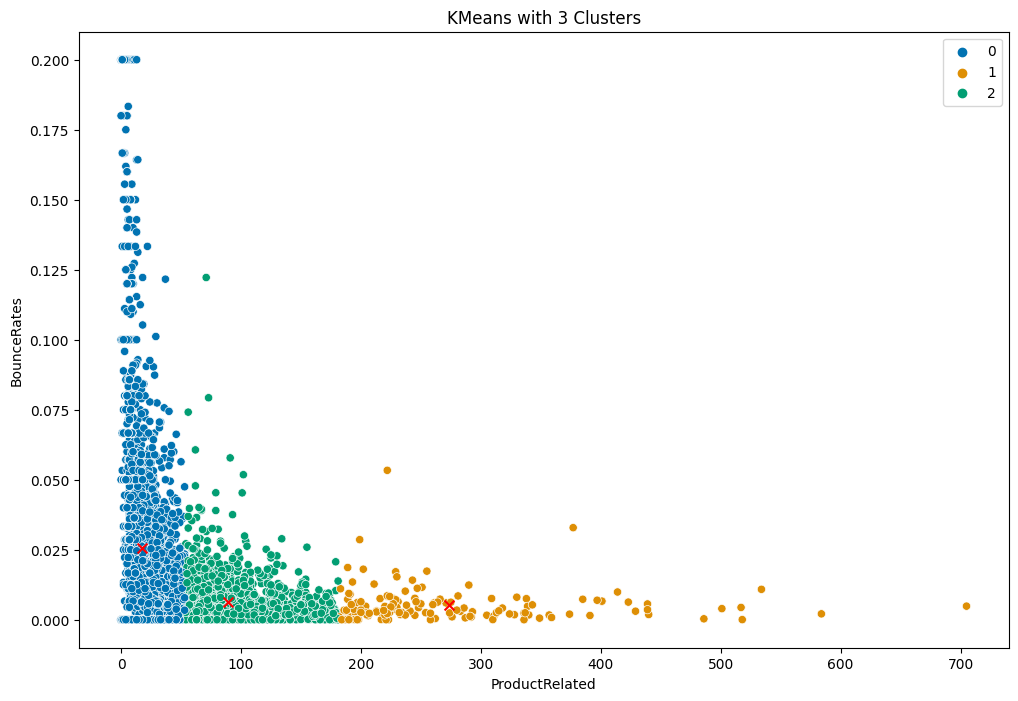

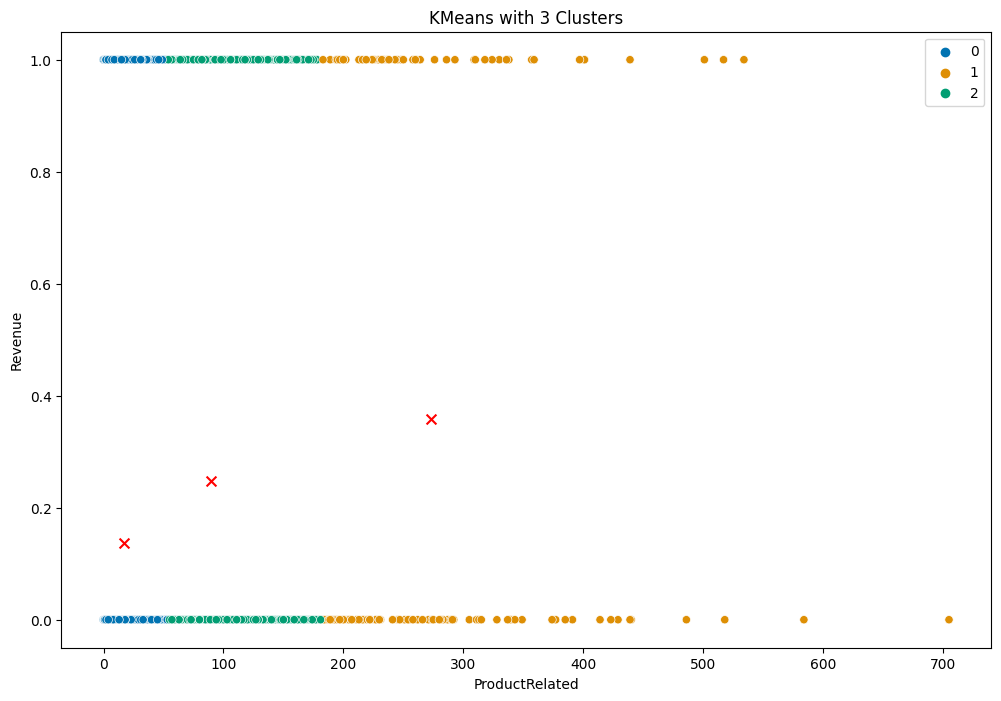

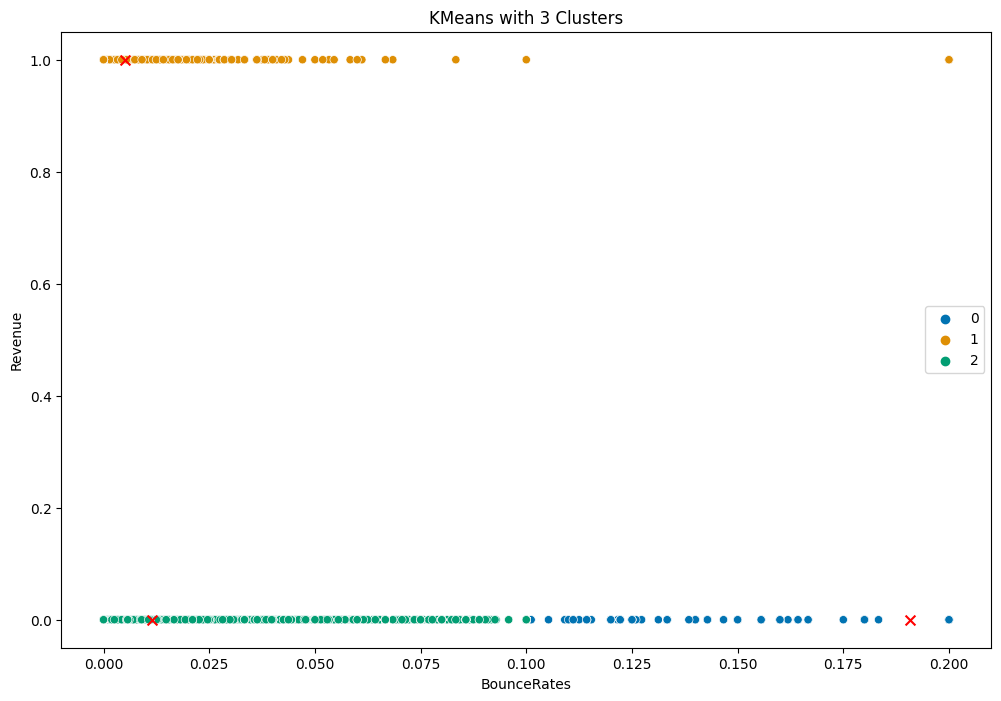

In [41]:

for i in range(df_clusters.shape[1]):
    for j in range(i+1, df_clusters.shape[1]):
      
   
        
        km = KMeans(n_clusters=3, random_state=10).fit(df_clusters.iloc[:,[i,j]])
     

        
        plt.figure(figsize=(12, 8))
  
        sns.scatterplot(data = df_clusters, x = df_clusters.columns[i], y = df_clusters.columns[j], hue=km.labels_, palette='colorblind')
      
        plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker="x", color='r', s=50)
        plt.title('KMeans with 3 Clusters')
        plt.show()

Based on the above charts, we can say that 
1) Exit rates, Page values can be used to seperate the customers. Higher the page values, lower the exit rates.
2) Page values and Product related duration - higher product related duration 
3) Page values and bounce rates - as page values increases we can group the customers
4) Exit rates and Product related duration - higher product related duration 
5) Exit rates and bounce rates - higher product related counts
6) Product related duration and bounce rates
Overall, we can look at the exit rates, bounce rates, product related visits and duration to segment customers.

Semi Supervised

In [43]:

labeled = df[df['Month'].isin([5,6,7,8,9])]
unlabeled = df[df['Month'].isin([10,11,12])]
test = df[df['Month'].isin([2,3])]


In [44]:
labeled_x = labeled.loc[:, labeled.columns != 'Revenue']
labeled_y = labeled['Revenue']

unlabeled_x = unlabeled.loc[:, unlabeled.columns != 'Revenue']
s = pd.Series([-1])

unlabeled_y = s.repeat([unlabeled_x.shape[0]])


test_x = test.loc[:, test.columns != 'Revenue']
test_y = test['Revenue']

In [45]:
lr = LogisticRegression()
lr.fit(labeled_x, labeled_y)
y_pred = lr.predict(test_x)
print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1945
           1       0.54      0.73      0.62       146

    accuracy                           0.94      2091
   macro avg       0.76      0.84      0.79      2091
weighted avg       0.95      0.94      0.94      2091



/opt/homebrew/Caskroom/miniforge/base/envs/mle-9/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
label_unlabel_x = pd.concat([labeled_x, unlabeled_x])
label_unlabel_y = pd.concat([labeled_y, unlabeled_y])

In [47]:
from sklearn.semi_supervised import LabelSpreading 
label = LabelSpreading(kernel='knn', alpha=0.01)
label.fit(label_unlabel_x, label_unlabel_y)
label_unlabel_y = label.transduction_ 



In [48]:
lr.fit(label_unlabel_x, label_unlabel_y)
y_pred = lr.predict(test_x)
print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1978
           1       0.43      0.74      0.55       113

    accuracy                           0.93      2091
   macro avg       0.71      0.84      0.75      2091
weighted avg       0.95      0.93      0.94      2091



/opt/homebrew/Caskroom/miniforge/base/envs/mle-9/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
